<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Copy Longitude and Latitude from Google Maps and create a list

In [ ]:
df = (51.0425253, -113.9086744), (51.0815078, -113.9582503), (51.0738879, -113.9856369), (51.0750761, -114.0000653), (51.0837355, -113.9972469), (51.0986661, -114.0322384), (51.1176348, -114.0335845), (51.1595451, -114.0197974), (51.1512990, -114.0730043), (51.1777062, -114.1472100), (51.1264175, -114.2041345), (51.1013916, -114.1440530), (51.0732674, -114.0758363), (51.0686879, -114.1151962), (51.0506831, -114.0666203), (51.0392368, -114.0939548), (51.0391420, -114.1393799), (51.0218659, -114.0596414)

In [ ]:
df=pd.DataFrame(df, columns=["lat", "long"])

In [ ]:
df

,lat,long
0,51.042525,-113.908674
1,51.081508,-113.958250
2,51.073888,-113.985637
3,51.075076,-114.000065
4,51.083736,-113.997247
5,51.098666,-114.032238
6,51.117635,-114.033585
7,51.159545,-114.019797
8,51.151299,-114.073004
9,51.177706,-114.147210


## Alternative: Import from Excel spreadsheet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/mcdonalds.xlsx', header=None)

In [ ]:
split_data = df[0].str.strip(')').str.strip('(').str.split(', ')
df['lat'] = split_data.apply(lambda x: x[0])
df['long'] = split_data.apply(lambda x: x[1])

## Plot Locations

In [ ]:
import folium

In [ ]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

In [ ]:
m = folium.Map(location=(df["lat"].mean(), df["long"].mean()), zoom_start=10, tiles="cartodb positron")

In [ ]:
for index, row in df.iterrows():
    marker = folium.CircleMarker(location=(row["lat"], row["long"]), radius=1.25)
    marker.add_to(m)

In [ ]:
m

## Voronoi Polygons

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
vor = Voronoi(df[["long","lat"]].values)

In [ ]:
import matplotlib.pyplot as plt

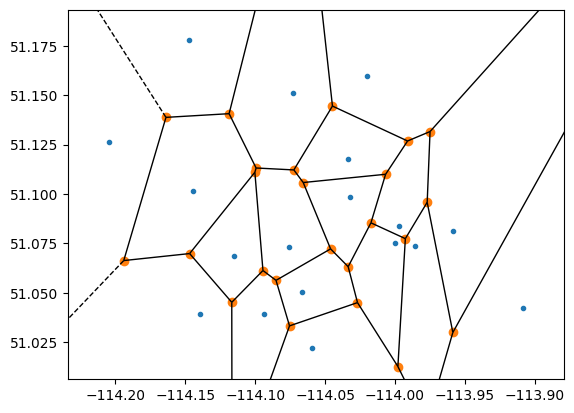

In [ ]:
fig = voronoi_plot_2d(vor)
plt.show()

In [ ]:
from shapely.geometry import Polygon
import geopandas as gpd

In [ ]:
voronoi_polygons = [Polygon(vor.vertices[region])
                    for region in vor.regions
                    if region and -1 not in region]

In [ ]:
gdf_voronoi = gpd.GeoDataFrame(geometry=voronoi_polygons, crs='EPSG:4326')

In [ ]:
gdf_voronoi

,geometry
0,"POLYGON ((-113.97699 51.09585, -113.95866 51.0..."
1,"POLYGON ((-114.10018 51.11102, -114.14680 51.0..."
2,"POLYGON ((-114.09439 51.06131, -114.11668 51.0..."
3,"POLYGON ((-114.09439 51.06131, -114.11668 51.0..."
4,"POLYGON ((-114.06561 51.10583, -114.00672 51.1..."
5,"POLYGON ((-114.07230 51.11221, -114.09928 51.1..."
6,"POLYGON ((-114.06561 51.10583, -114.04605 51.0..."
7,"POLYGON ((-113.99261 51.07744, -114.01720 51.0..."
8,"POLYGON ((-114.01720 51.08544, -114.00672 51.1..."
9,"POLYGON ((-114.02682 51.04507, -114.07541 51.0..."


## Overlay polygons on map

In [ ]:
m = folium.Map(location=(df["lat"].mean(), df["long"].mean()), zoom_start=10, tiles="cartodb positron")

for index, row in df.iterrows():
    marker = folium.CircleMarker(location=(row["lat"], row["long"]), radius=1.25)
    marker.add_to(m)

folium.GeoJson(gdf_voronoi).add_to(m)

In [ ]:
m